In [25]:
import pandas as pd
import plotly.express as px

## Row Data, without applying Normalisation and removing Outliers

### csv uploads

In [26]:
mysportsbetting=pd.read_csv("Data\mysportsbetting.csv")                  
mysportsbetting.head(2)

,Sport,Wager,Paid,Winnings,Hold,Purchase_Time,Competition,Event,Event_Date,Gender_Competition,Sport_Group,Month,Day_of_Week,Month_Name,Day_of_Week_Name,Sport_encoded,Purchase_Time_encoded,Competition_encoded,Event_encoded,Sport_Group_encoded
0,Basketball,1.00,0.0,1.00,1.0,Prematch,Germany Bundesliga,Alba Berlín - BG Gottingen,2024-02-13,Male,Basketball,2,1,February,Tuesday,3,1,504,1186,0
1,Basketball,42.52,0.0,42.52,1.0,Prematch,Germany Bundesliga,Alba Berlín - EWE Baskets Oldenburg,2024-03-03,Male,Basketball,3,6,March,Sunday,3,1,504,1188,0


### Correlation overview

In [27]:
px.imshow(mysportsbetting.corr("spearman").round(2), text_auto=True, title="Spearman Correlation between numerical variables", 
          template="plotly_dark", color_continuous_scale="RdBu_r", width=900, height=600)

C:\Users\mayin\AppData\Local\Temp\ipykernel_23660\1574180648.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



### Models

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
 
selected_columns = mysportsbetting[["Winnings", "Wager", "Purchase_Time_encoded", "Sport_Group_encoded"]]       #Selected columns for the model from mysportsbetting 
 
X = selected_columns.drop(columns=["Winnings"])                                                                 #Winnings is the object variable and will be "y"
y = selected_columns["Winnings"]                         
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)                       #Division between train(80%) and test(20%)
 
scaler = StandardScaler()                                                                                       #Scaler for models Ridge, Lasso, ElasticNet and PolinomialFeatures
scaler.fit(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
models = [                                                                                                      #Models list to apply, with scaler when needed
    make_pipeline(StandardScaler(), SVR()),
    make_pipeline(StandardScaler(), Ridge()),
    make_pipeline(StandardScaler(), Lasso()),
    make_pipeline(StandardScaler(), ElasticNet()),
    RandomForestRegressor(),
    GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=5),
    make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
]
 
model_names = []                                                                                               #Initializa empty list for different results
mse_values = []
r2_values = []
 
for model in models:                                                                                           #Train and evaluate models from the list
    model.fit(X_train_scaled, y_train)                                                                             #Adjust the model
    y_pred = model.predict(X_test_scaled)                                                                          #Predictions
    mse = mean_squared_error(y_test, y_pred)                                                                       #Calculate squared error   
    r2 = r2_score(y_test, y_pred)                                                                                  #Calculate coefficient of determination
 
    model_names.append(type(model).__name__)                                                                  # Add results to their corresponding lists
    mse_values.append(mse)
    r2_values.append(r2)
 
    print(f"Model: {model.steps[-1][1].__class__.__name__}" if hasattr(model, 'steps') else f"Model: {type(model).__name__}")        #Print results
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R^2 Score: {r2}")
    print()


Model: SVR
Mean Squared Error (MSE): 38779.57157139678
R^2 Score: -0.017164726748259085

Model: Ridge
Mean Squared Error (MSE): 33468.859751406664
R^2 Score: 0.12213203487979696

Model: Lasso
Mean Squared Error (MSE): 33633.629156963514
R^2 Score: 0.11781023294675752

Model: ElasticNet
Mean Squared Error (MSE): 34939.17019594961
R^2 Score: 0.08356668046877169

Model: RandomForestRegressor
Mean Squared Error (MSE): 66612.73300207205
R^2 Score: -0.7472117307243085

Model: GradientBoostingRegressor
Mean Squared Error (MSE): 26767.63210218512
R^2 Score: 0.2979011863813539

Model: LinearRegression
Mean Squared Error (MSE): 30418.194626776836
R^2 Score: 0.20214913749738472



Notes:

- The MSE is very high in all models, indicating that the models are not good and would give a lot of error. 
- R2 is negative in some of the examples and in none is close to 1. They do not fit the data well and are deficient in the prediction task.

## Cleaned Data, applying Normalisation and removing Outliers

### csv upload

In [31]:
mysportsbetting_filtered=pd.read_csv("Data\mysportsbetting_filtered.csv")                    # .csv upload
mysportsbetting_filtered.head(2)

,Sport,Wager,Paid,Winnings,Hold,Purchase_Time,Competition,Event,Event_Date,Gender_Competition,Sport_Group,Month,Day_of_Week,Month_Name,Day_of_Week_Name,Sport_encoded,Purchase_Time_encoded,Competition_encoded,Event_encoded,Sport_Group_encoded
0,Basketball,-0.101985,0.0,-0.012107,0.0,Prematch,Germany Bundesliga,Alba Berlín - BG Gottingen,2024-02-13,Male,Basketball,0.0,-1.000000,February,Tuesday,3,1,504,1186,0
1,Basketball,2.186880,0.0,5.014528,0.0,Prematch,Germany Bundesliga,Alba Berlín - EWE Baskets Oldenburg,2024-03-03,Male,Basketball,0.5,0.666667,March,Sunday,3,1,504,1188,0


### Correlation overview

In [32]:
px.imshow(mysportsbetting_filtered.corr("spearman").round(2), text_auto=True, title="Spearman Correlation between numerical variables", 
          template="plotly_dark", color_continuous_scale="RdBu_r", width=900, height=600)

C:\Users\mayin\AppData\Local\Temp\ipykernel_23660\848038763.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



### Models

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
 
selected_columns = mysportsbetting_filtered[["Winnings", "Wager", "Purchase_Time_encoded", "Sport_Group_encoded"]]       #Selected columns for the model from mysportsbetting 
 
X = selected_columns.drop(columns=["Winnings"])                                                                 #Winnings is the object variable and will be "y"
y = selected_columns["Winnings"]                         
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)                       #Division between train(80%) and test(20%)
 
scaler = StandardScaler()                                                                                       #Scaler for models Ridge, Lasso, ElasticNet and PolinomialFeatures
scaler.fit(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
models = [                                                                                                      #Models list to apply, with scaler when needed
    make_pipeline(StandardScaler(), SVR()),
    make_pipeline(StandardScaler(), Ridge()),
    make_pipeline(StandardScaler(), Lasso()),
    make_pipeline(StandardScaler(), ElasticNet()),
    RandomForestRegressor(),
    GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=5),
    make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
]
 
model_names = []                                                                                               #Initializa empty list for different results
mse_values = []
r2_values = []
 
for model in models:                                                                                           #Train and evaluate models from the list
    model.fit(X_train_scaled, y_train)                                                                             #Adjust the model
    y_pred = model.predict(X_test_scaled)                                                                          #Predictions
    mse = mean_squared_error(y_test, y_pred)                                                                       #Calculate squared error   
    r2 = r2_score(y_test, y_pred)                                                                                  #Calculate coefficient of determination
 
    model_names.append(type(model).__name__)                                                                  # Add results to their corresponding lists
    mse_values.append(mse)
    r2_values.append(r2)
 
    print(f"Model: {model.steps[-1][1].__class__.__name__}" if hasattr(model, 'steps') else f"Model: {type(model).__name__}")        #Print results
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R^2 Score: {r2}")
    print()


Model: SVR
Mean Squared Error (MSE): 312.54303375713175
R^2 Score: 0.23905533400371348

Model: Ridge
Mean Squared Error (MSE): 114.67311898950437
R^2 Score: 0.7208067728169939

Model: Lasso
Mean Squared Error (MSE): 117.30969446204324
R^2 Score: 0.7143875350620928

Model: ElasticNet
Mean Squared Error (MSE): 158.06641668935222
R^2 Score: 0.6151576465902774

Model: RandomForestRegressor
Mean Squared Error (MSE): 107.15859991269798
R^2 Score: 0.7391022796477958

Model: GradientBoostingRegressor
Mean Squared Error (MSE): 143.53449675972695
R^2 Score: 0.6505383326487812

Model: LinearRegression
Mean Squared Error (MSE): 114.04812224787206
R^2 Score: 0.7223284446683644



In [34]:
model_names

['Pipeline',
 'Pipeline',
 'Pipeline',
 'Pipeline',
 'RandomForestRegressor',
 'GradientBoostingRegressor',
 'Pipeline']

In [43]:
renamed_model_names = [
    'SVR with StandardScaler',
    'Ridge with StandardScaler',
    'Lasso with StandardScaler',
    'ElasticNet with StandardScaler',
    'RandomForestRegressor',
    'GradientBoostingRegressor',
    'Polynomial Regression with StandardScaler'
]

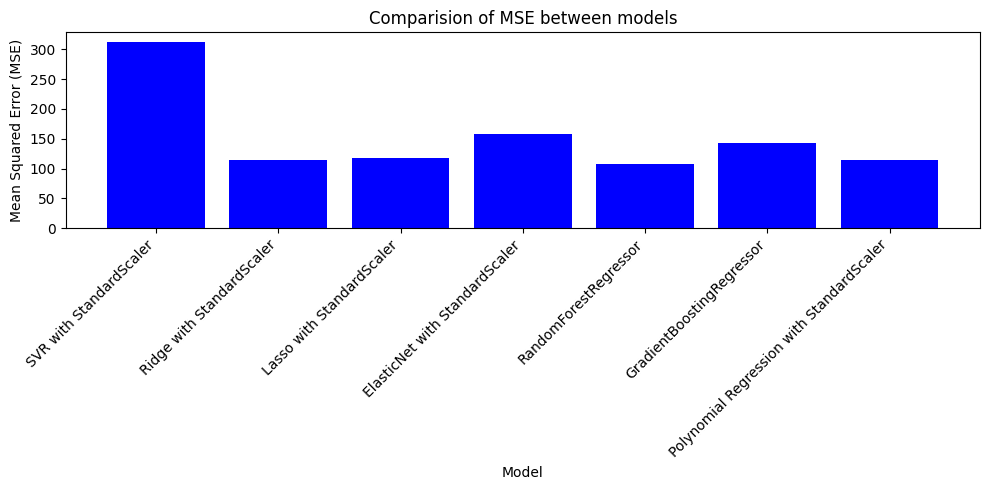

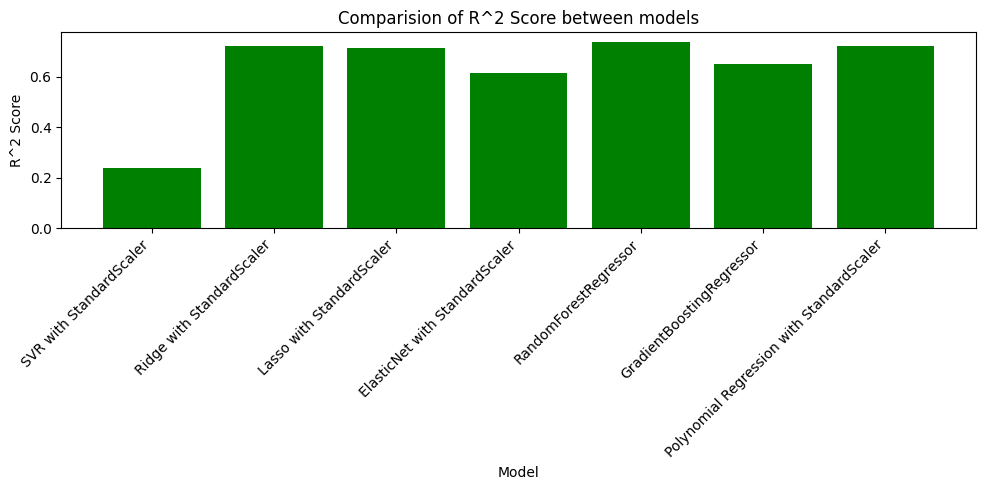

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))                                                      # MSE Grahp
plt.bar(renamed_model_names, mse_values, color='blue')
plt.title('Comparision of MSE between models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))                                                      # R^2 Score Graph
plt.bar(renamed_model_names, r2_values, color='green')
plt.title('Comparision of R^2 Score between models')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

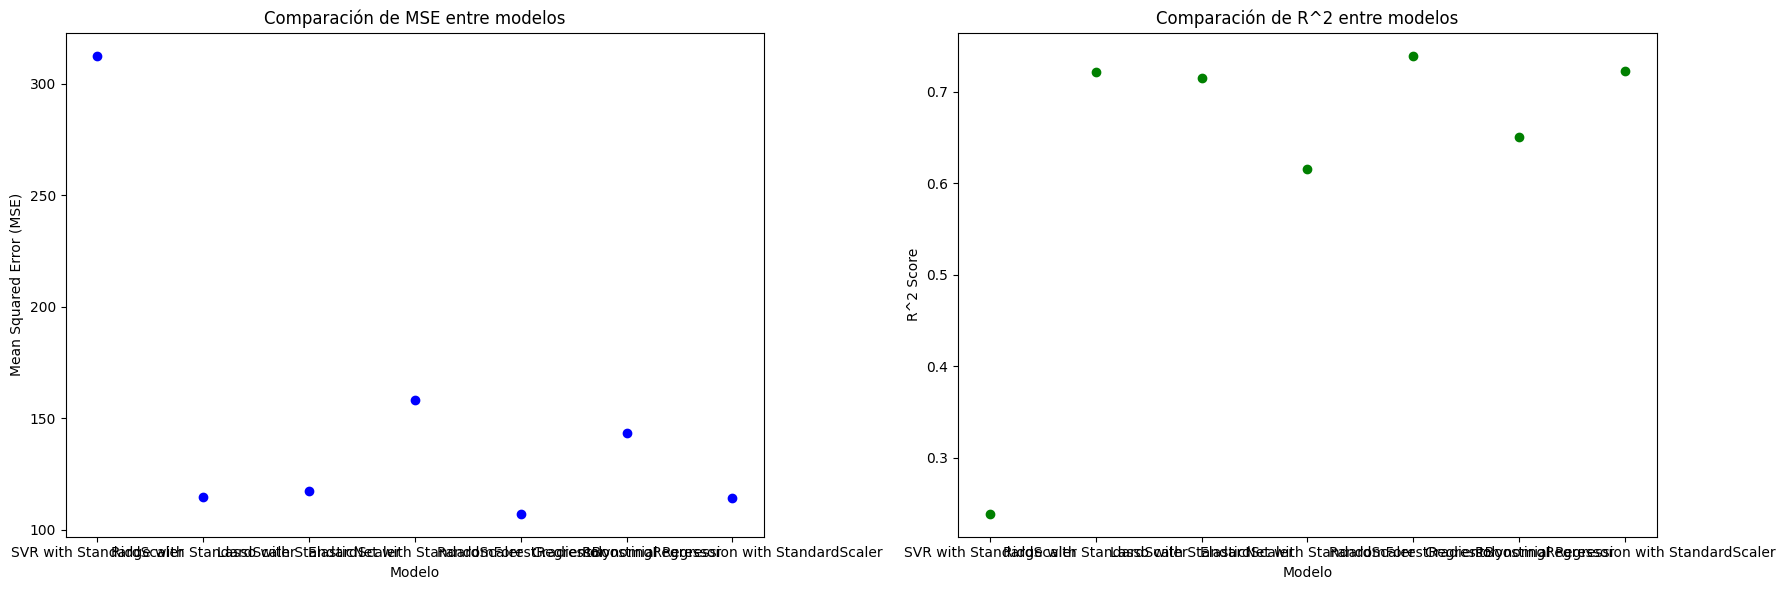

In [45]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# MSE
axs[0].scatter(renamed_model_names, mse_values, color='blue')
axs[0].set_ylabel('Mean Squared Error (MSE)')
axs[0].set_xlabel('Modelo')
axs[0].set_title('Comparación de MSE entre modelos')


# R^2 Score
axs[1].scatter(renamed_model_names, r2_values, color='green')
axs[1].set_ylabel('R^2 Score')
axs[1].set_xlabel('Modelo')
axs[1].set_title('Comparación de R^2 entre modelos')


plt.tight_layout()
plt.show()

Notes:

- As with mysportsbetting, best model is Random Forest Regressor with MSE of 107 and R2 of 0.73.
- Even R2 is near to 1, MSE is still too high to be a good prediction model.

## Comparision

- The Mean Squared Error (MSE) is a measure of the quality of a regression model. The lower the MSE value, the better the model.
- In this case, the results of the models are better if the normalized dataset is used and without part of the outliers.
- According to the MSE, the best model is RandomForestRegressor, with an MSE of 103.25579714502692, the lowest of all the models tested.
- According to R2, the best model is again RandomForestRegressor, with 0.7486043853667881. It is the one that is closest to 1 and, therefore, the model in which the predicted values are closest to the actual values. 

## Selected model: Random Forest Regression

In [37]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor()                                             # Application of RandomForestRegressor
rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)

rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Model: RandomForestRegressor")                                        #Print results
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"R^2 Score: {rf_r2}")
print(f"Prediction: {rf_y_pred}")
print()

Model: RandomForestRegressor
Mean Squared Error (MSE): 104.9166360207481
R^2 Score: 0.7445607614588517
Prediction: [-0.12586438 -0.03081316 -0.13510458 ...  0.86101695 -0.07865617
 -0.05348677]



## New manual Prediction

In [38]:
selected_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
Winnings,22482.0,2.560486,19.390431,-536.217918,-0.119855,0.027845,0.958535,852.851090
Wager,22482.0,1.502843,8.368932,-0.156560,-0.129548,-0.025910,0.565601,389.499449
Purchase_Time_encoded,22482.0,0.673072,0.469101,0.000000,0.000000,1.000000,1.000000,1.000000
Sport_Group_encoded,22482.0,1.390979,1.176163,0.000000,1.000000,1.000000,1.000000,5.000000


### With created new random data

In [48]:
import numpy as np

new_data = []                                         #Inicializate list for new data generated
for _ in range(5):                                    # Generate 5 new entries
                                                      # Generate random values between specific ranges (min and max of each column)
    wager = np.random.uniform(0.1, 400)               
    purchase_time_encoded = np.random.choice([0, 1])  
    sport_group_encoded = np.random.choice([0, 5])    
 
    new_data.append([wager, purchase_time_encoded, sport_group_encoded])      # Add new entry to the list

new_data = np.array(new_data)                                                 #Convert listi to an array

print("New entries randomly generated:")                            #Print results
print(new_data)

New entries randomly generated:
[[155.96866164   0.           5.        ]
 [168.19481353   0.           0.        ]
 [ 81.41886855   0.           0.        ]
 [110.90017572   0.           0.        ]
 [104.56344539   0.           0.        ]]


In [49]:
new_data_scaled = scaler.transform(new_data)                     #Scale new data
prediction = rf_model.predict(new_data_scaled)                   #New predition

print("New manual prediction:")
print("Win prediction:", prediction)

New manual prediction:
Win prediction: [1866.29921308 1866.29921308 1866.29921308 1866.29921308 1866.29921308]


c:\Users\mayin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



### With real data

In [41]:
import numpy as np

new_data = np.array([
    [42.52, 1, 0],
    [2.5, 0, 0],
    [1, 1, 0],
    [4.33, 1, 0],
    [15.33, 1, 1],
    [75.65, 1, 1],
    [32.17, 0, 1],
    [171, 0, 1],
    [10, 1, 3],
    [23, 1, 3],
    [2, 1, 3],
    [2.1, 1, 3],
    [8.33, 0, 4],
    [58.04, 1, 4],
    [30, 0, 4],
    [0.55, 1, 4],
    [0.5, 1, 5],
    [100, 0, 5],
    [0.5, 1, 5],
    [169, 0, 5]
])

new_data_scaled = scaler.transform(new_data)               #Scalation
predictions = rf_model.predict(new_data_scaled)            #Prediction

print("Predictions:")
for i, prediction in enumerate(predictions):
    print(f"Data {i+1}: {prediction}")

Predictions:
Data 1: 86.28463680387411
Data 2: 4.981185257726294
Data 3: 2.047298512625389
Data 4: 9.631961259079908
Data 5: 29.958825665859557
Data 6: 96.61209443099284
Data 7: 24.808644067796617
Data 8: 364.73843825665864
Data 9: 21.655181598062946
Data 10: 51.51753026634382
Data 11: -0.042046797532572205
Data 12: -7.679053456128213
Data 13: 15.87592009685231
Data 14: 105.61935835351096
Data 15: 58.47501210653747
Data 16: 0.7217826876513316
Data 17: 1.231380145278448
Data 18: 176.33601694915268
Data 19: 1.231380145278448
Data 20: 362.8210048426146


c:\Users\mayin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [50]:
# Group the original data by sport and by time of purchase, and calculate total bets and total winnings.
grouped_data = selected_columns.groupby(['Sport_Group_encoded', 'Purchase_Time_encoded']).agg({'Winnings': 'sum', 'Wager': 'count'}).reset_index()
grouped_data.columns = ['Sport_Group_encoded', 'Purchase_Time_encoded', 'Total_Winnings', 'Total_Bets']

X_grouped = grouped_data[['Sport_Group_encoded', 'Purchase_Time_encoded', 'Total_Bets']]              #Prediction
y_grouped = grouped_data['Total_Winnings']

X_train_grouped, X_test_grouped, y_train_grouped, y_test_grouped = train_test_split(X_grouped, y_grouped, test_size=0.2, random_state=42)      #Division train and test

X_train_grouped_scaled = scaler.fit_transform(X_train_grouped)            #Scalation
X_test_grouped_scaled = scaler.transform(X_test_grouped)

rf_model.fit(X_train_grouped_scaled, y_train_grouped)                     #Train model

predictions_grouped = rf_model.predict(X_test_grouped_scaled)             #Prediction with trained model


print("Predictions:")
for i, prediction in enumerate(predictions_grouped):
    print(f"Sport Group: {X_test_grouped.iloc[i]['Sport_Group_encoded']}, Purchase Time: {X_test_grouped.iloc[i]['Purchase_Time_encoded']}, Predicted Total Winnings: {prediction}")

Predictions:
Sport Group: 5, Purchase Time: 0, Predicted Total Winnings: 2395.8846489104153
Sport Group: 0, Purchase Time: 1, Predicted Total Winnings: 6153.9820702179195


## Azure: Automated ML

### Model train with myspotrsbetting

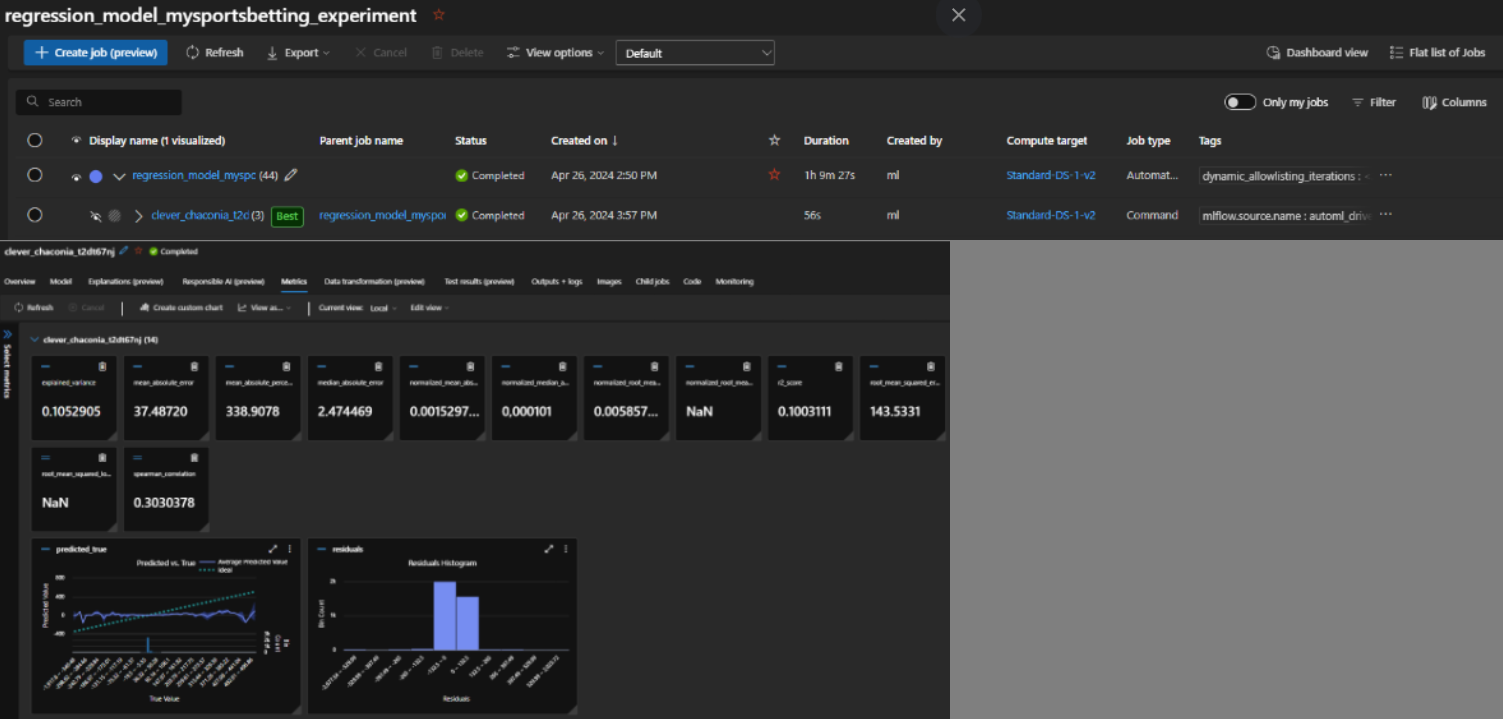

Not a good model

### Model train with myspotrsbetting_filtered

`hungry_square` has been the best model in a first try:

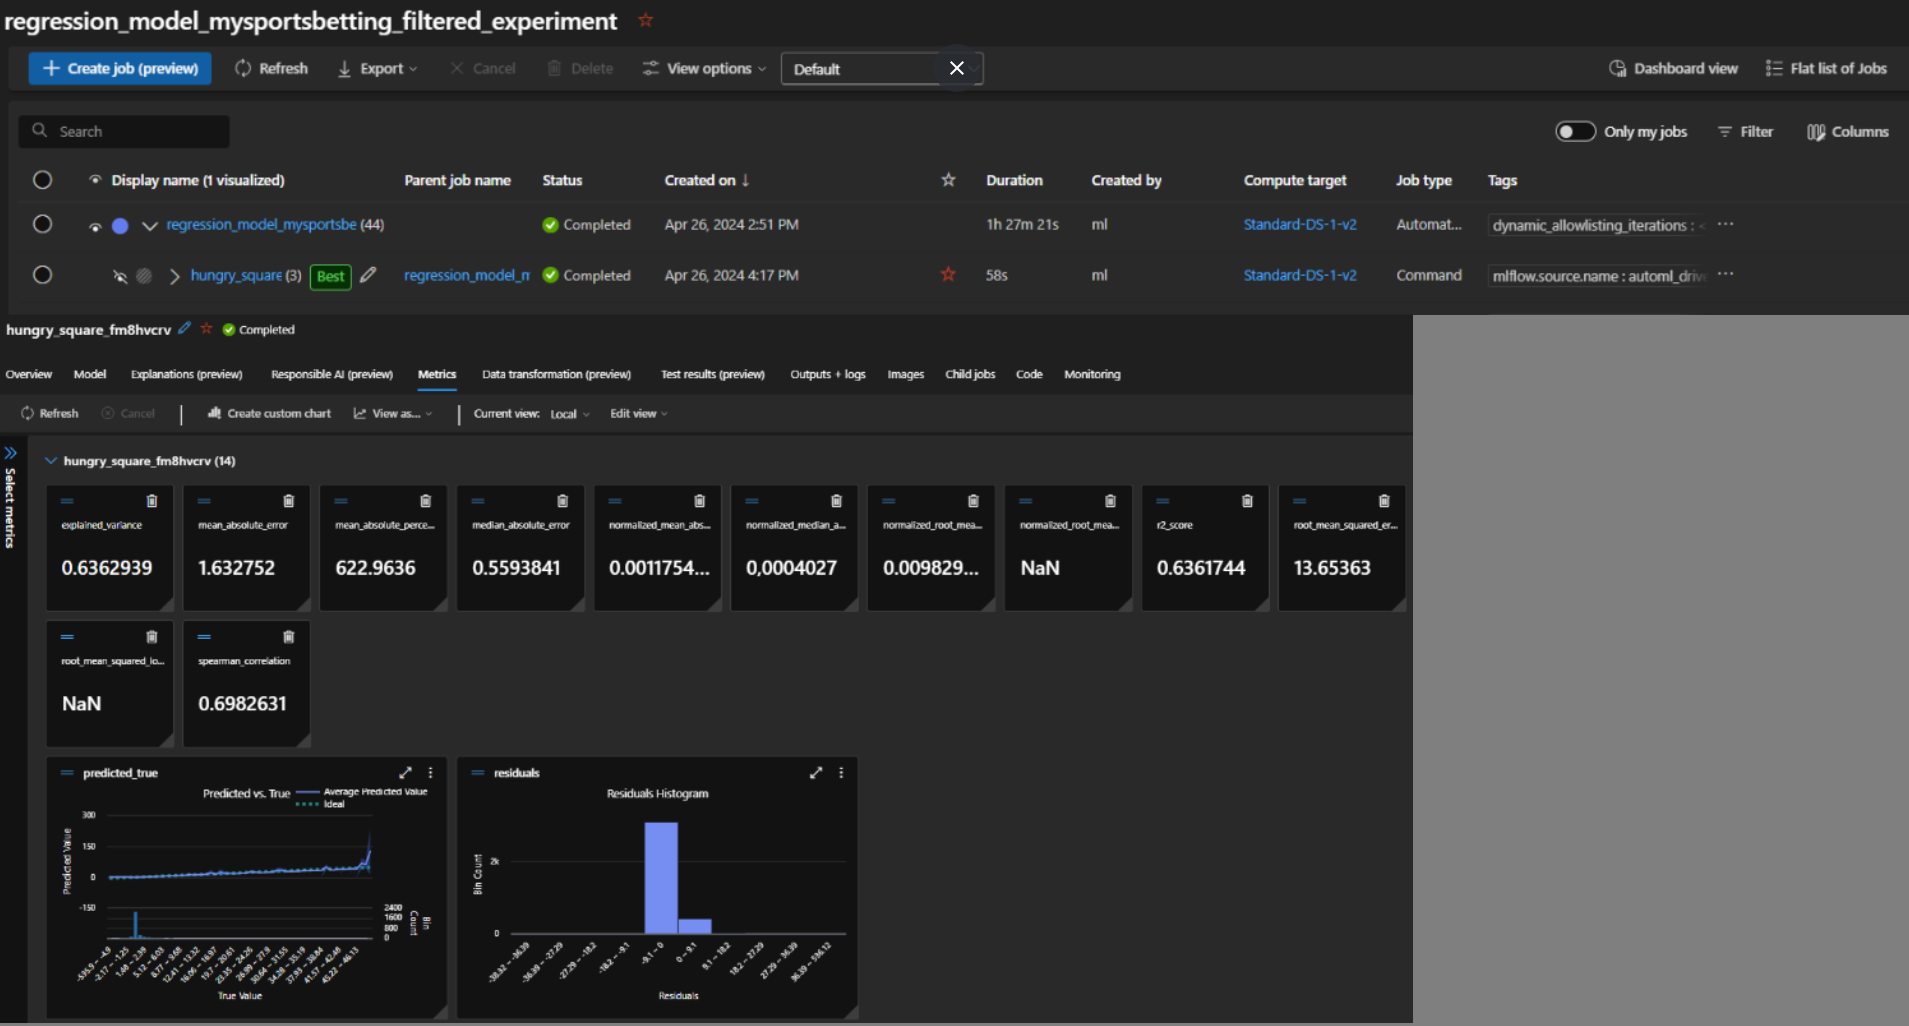

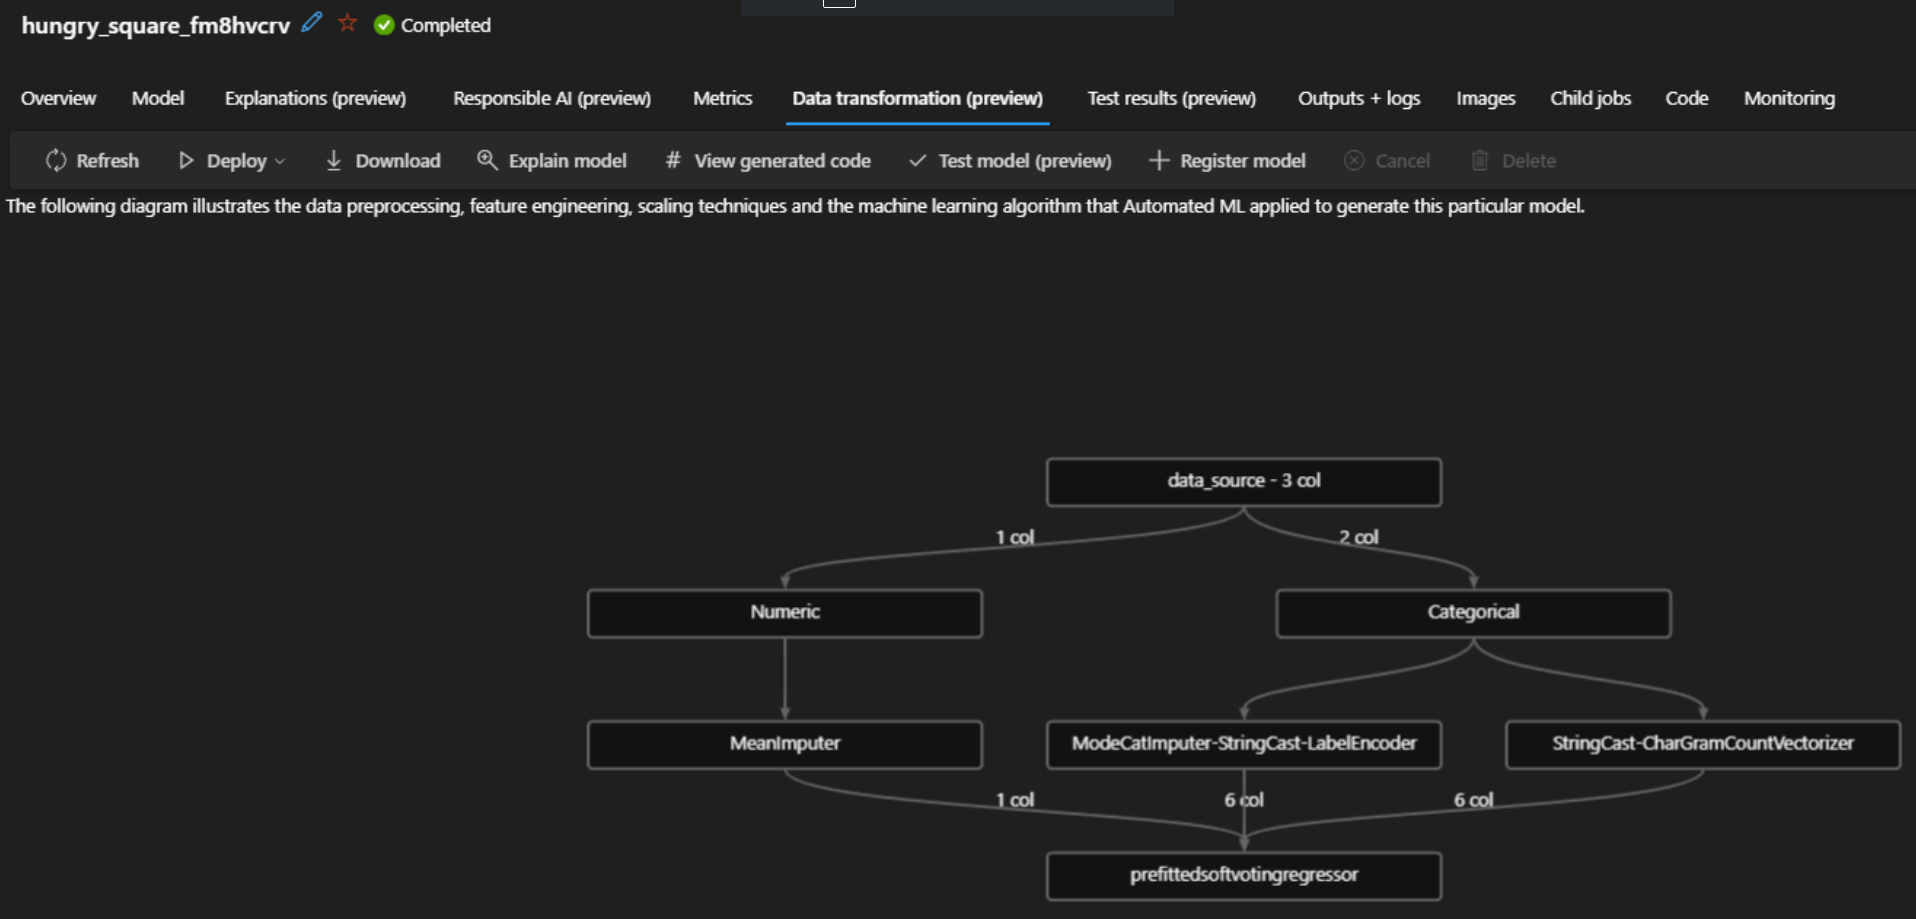

`green_holiday_tlwygl89` has been the best ina second try:

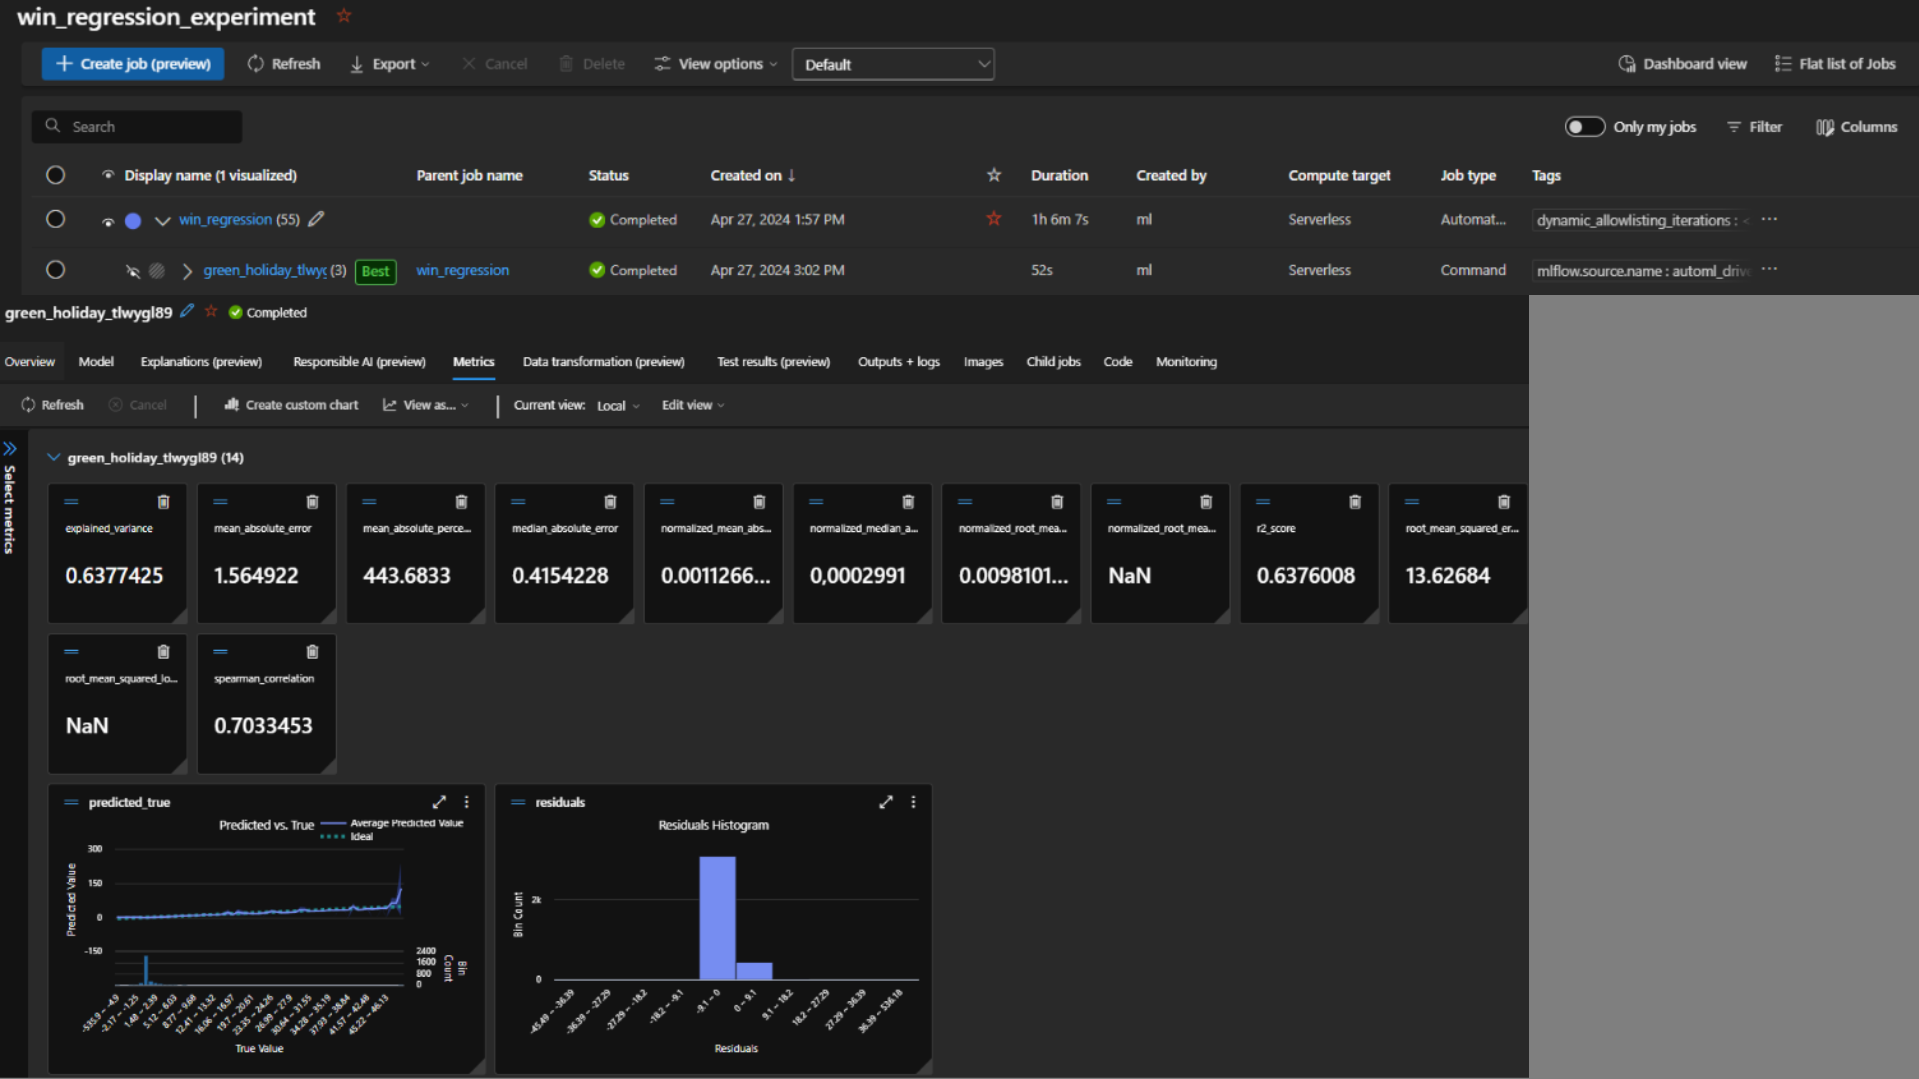

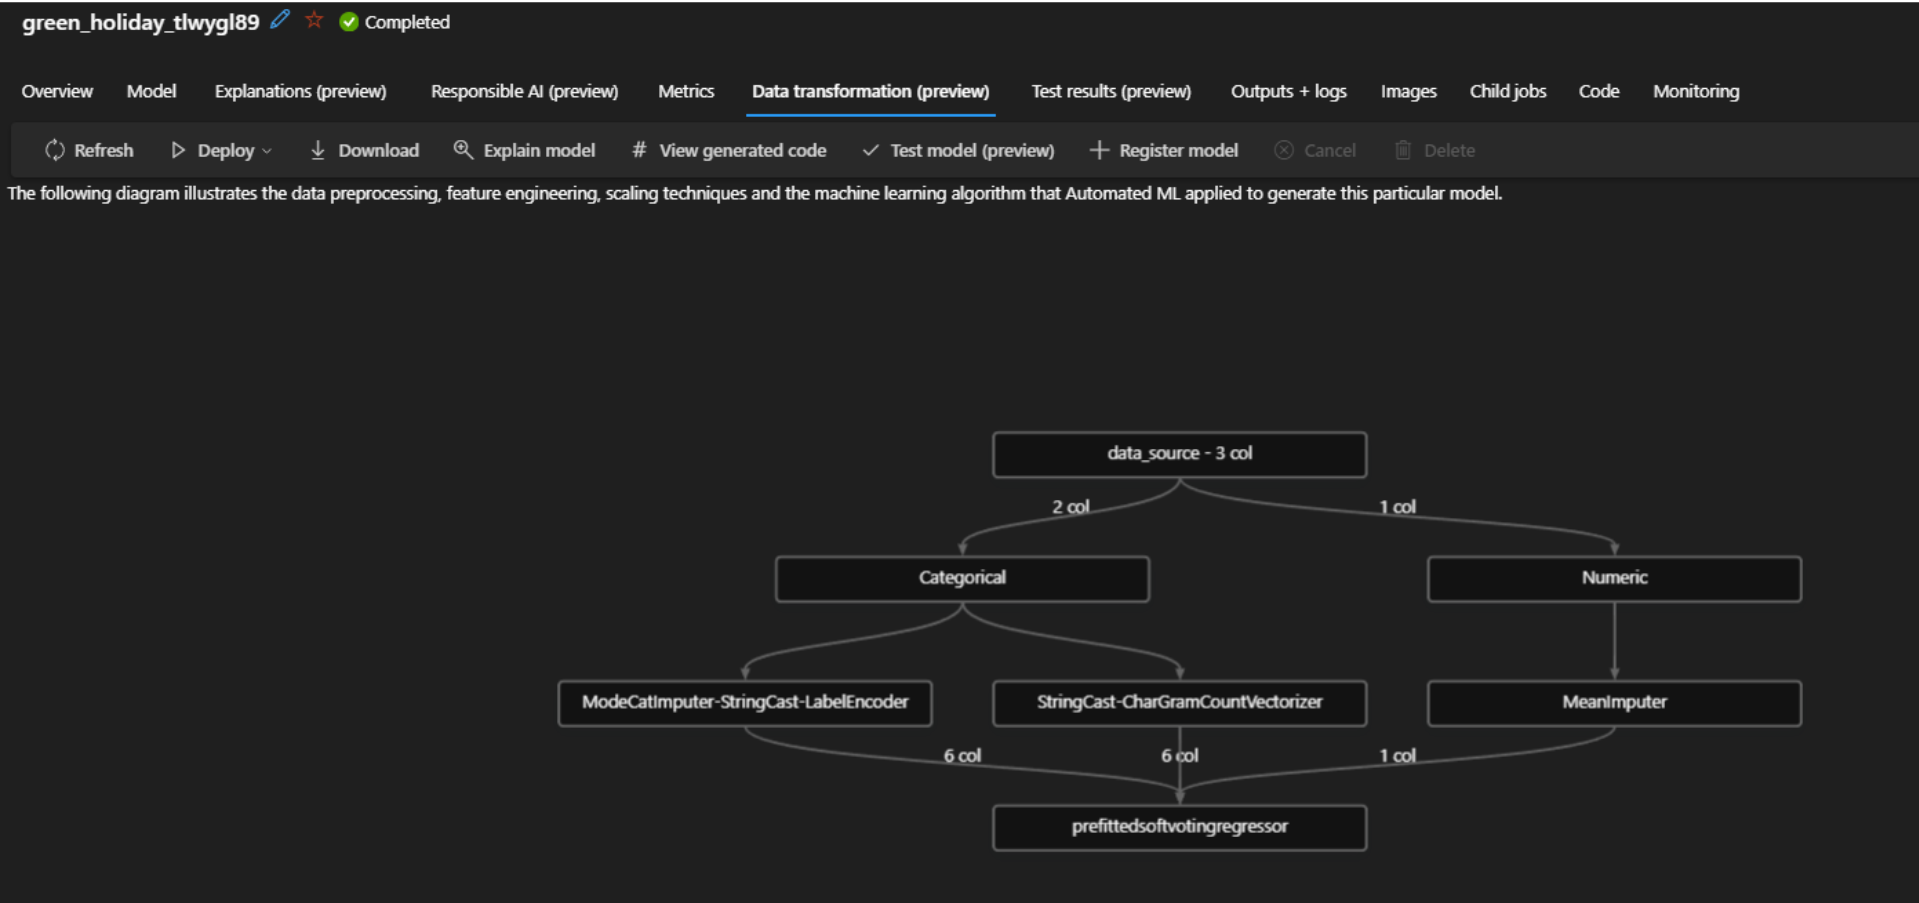

## Conclusions

- After all test, we will use Automated ML from Azure and `green_holiday_tlwygl89` model, as is the one that offers the best predictions.